# 알고리즘 : Linear Regression
### 미션 : 보험데이터 셋을 이용 하여 보험사에서 청구할 보험료를 예측하라.
### 종속 변수 : charges (청구비용)
### 평가 지표 : RMSE(평균 제곱근 편차)
### 문제 유형 : 회귀


지도학습 알고리즘 1
선형 회귀 모델
학습 순서
1. 문제정의 -> 2. 라이브러리 및 데이터 불러오기 -> 3. 데이터 확인하기 -> 4. 전처리: 학습셋과 실험셋 나누기 -> 5. 데이터 모델링 -> 6. 모델을 활용해 예측하기 -> 7. 예측 모델 평가하기 -> 8. 이해하기: 선행 회귀

정의 : 가장 기초적인 머신러닝. 여러가지 데이터를 활용혀여 연속형 변수인 목표 변수를 예측하는 것이 목적. 예를들어 몸무게, 나이, BMI, 성별 등의 데이터를 활용해서 키와 같은 연속형 변수를 예측. 연속형 변수는 165.5, 172.4, 182.9 와 같이 연속적으로 이어질 수 있는 변수를 의미. 이진분류가 아님. 선형회귀 모델에서는 예측할 종속변수만 연속형이면 족함. 

장점 : 모델이 간단해 구현 쉽고, 짧은 시간에 가능
단점 : 최신 알고리즘 대비 성능 떨어짐. 독립변수와 예측변수의 선형 관계를 전제로 하기 때문에, 이러한 전제에서 벗어나는 데이터에서는 안좋은 예측. (즉 선형관계를 전제로 한다)
유용한 곳 : 연속된 변수를 예측하는 데 사용. 예를들어 BMI, 매출액, 전력 사용량 과 같은 변수.

연속형 변수와 범주형 변수?
연속형 변수는 나이, 키와 같이 연속적으로 이어지는 변수 (수량화 O)
범주형 변수는 이어지는 숫자가 아닌 각 범주로 구성된 변수 (수량화 X, 계절 성별)

전처리: 학습셋과 시험셋 나누기
일반적으로 8:2로 하지만, 전체 데이터 크기가 작을수록 시험셋 비율을 낮게 잡는다. 학습셋이 더 중요하다. 때에 따라 너무 방대한 데이터는 6:4나 5:5로 나눌수 있다. 
   독립변수   종속변수
학습셋   X_train   y_train
시험셋   X_test   y_test
데이터 클리닝 : 지저분한 데이터를 정리하는 과정. 결측치 제거, 오탈자 수정, 불필요한 문자 제거 등
피처 엔지니어링 : 가지고 독립변수들을 활용해서 더욱 풍성하고 유용한 독립변수들을 만들어 내는 작업

4.2 라이브러리 불러오기

In [2]:
import pandas as pd

In [3]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

In [4]:
#데이터셋 읽기
data = pd.read_csv(file_url)

4.3 데이터 확인하기

In [5]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


1. 총 1338 rows x 6 columns
2. 6개의 변수 
3. 인덱스 1338개
* sex : 1 남자 / 0 여자
* smoker : 1 흡연자 / 0 비흡연자

In [7]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [8]:
#컬럼 정보 출력
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [9]:
#통계 정보 출력
data.describe( )

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [10]:
#소숫점 2째 자리까지만 표시해 통계 정보 출력
round(data.describe(),2)
#1. 개수 2. 평균 3. 표준편차 4. 최솟값 5~7. 사분위 8. 최댓값


,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


4.4 전처리 : 학습셋과 실험셋 나누기

In [11]:
# 전처리 : 학습셋과 실험셋 나누기
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

In [12]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=100)

4.5 모델링

In [18]:
#알고리즘 모델 불러오기
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
#학습 셋을 학십 시키는 것
model.fit(X_train, y_train)

LinearRegression()

4.6 모델을 활용해 예측하기
- 원래는 예측 및 평가에서 학습셋과 시험셋을 각각 사용해 오버피팅 문제를 확인. 이번엔 첫 예제니 간단하게...

In [21]:
# 함수에 평가셋의 독립변수를 인수로 대입 (예측대상)
pred = model.predict(X_test)

4.7 예측 모델 평가하기
- 테이블로 평가하기
- 그래프로 평가하기
- 통계적인 방법으로 평가하기 (RSME)

In [22]:
#테이블로 평가하기
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})
#pred 에는 예측한 값이, 각각 관측치에 실제 정보는 y_test에 저장되어 있음

In [23]:
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


In [24]:
#그래프로 평가하기
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='actual', ylabel='pred'>

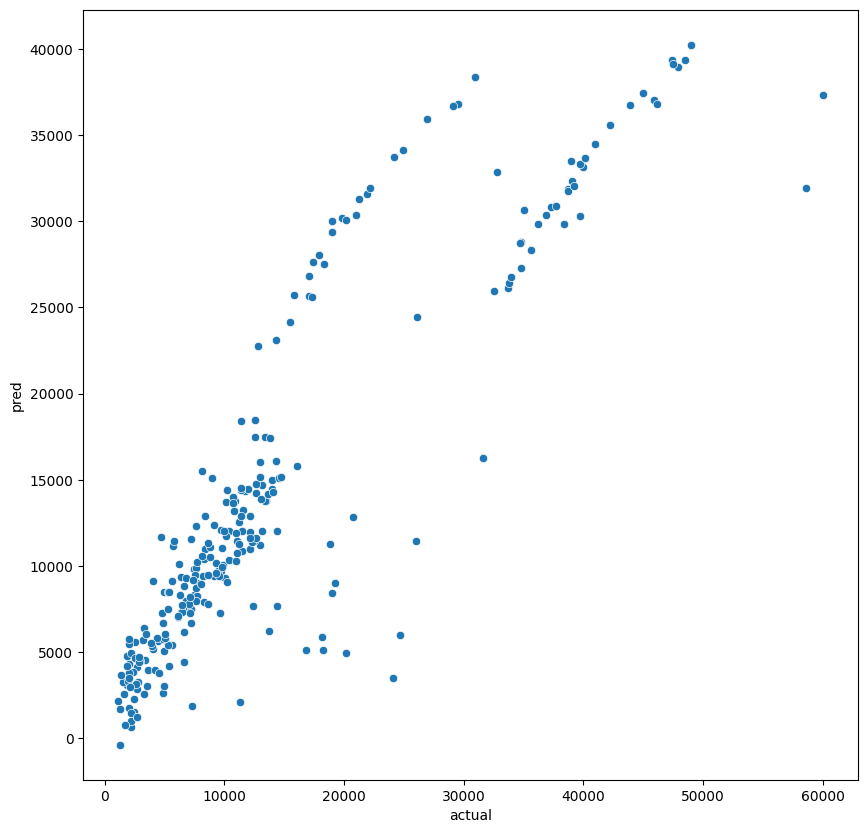

In [25]:
plt.figure(figsize = (10,10)) #그래프 크기 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

- 통계값으로 평가하기 Root Mean Squared Error (루트 평균 제곱근 오차, 평균 제곱근 편차)
- 즉 실제값과 예측값 사이의 오차를 각각 합산하는 개념

ex1)   예측값       실제값      오차        오차(절대값)        오차(제곱)
0       10          5       +5           5                   25
1       15          5       +10          10                 100
2       10          5       +5           5                   25
3       15          5       +10          10                 100
합계                                      30                 250

ex2)   예측값       실제값      오차        오차(절대값)        오차(제곱)
0       5           5        0           0                   0
1       20          5       +15          15                 225
2       5           5        0           0                   0
3       2-          5       +15          15                 225
합계                                      30                 450

오차(제곱)에서 차이가 난다. 오차가 클수록 제곱하면 더 큰값이 됨. 통상 오차가 클 때 더 큰 페널티를 주는 것임. 또한 제곱근을 사용하는 수식의 장점은 미분이 가능하다.

절대값 차이를 이용하는 방법 = MAE(Mean Absolute Error)
제곱의 차이를 이용하는 방법 = MSE(Mean Squared Error) 
Mean을 붙히는 이유는 차이의 값에 총 합을 구해서 총 개수로 나누어 평균을 낸다. 
ex1의 MAE = 30/4 = 7.5
EX1의 MSE = 250/4 = 62.5

MSE를 통상적으로 많이 사용
단점은 제곱으로 인해 그 숫자의 규모가 실제 데이터의 스케일에 비해 너무 커진다.
이부분을 해소하기 위해서 MSE에 루트를 씌워준다 => RMSE

세개 모두 0에 가까울 수록 좋은 지표이다. 



In [26]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, pred) ** 0.5 #루트 씌우는 것

5684.927776334485

5684는 작은 수일까 큰수 일까?
절대적인 기준은 없다. 상대평가로 사용. 

In [28]:
from IPython.display import Image

R2 (R제곱)= 결정 계수. 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가르키는 지표로, 즉 설명력을 나타냄. 값이 1에 가까울수록 좋다.

이 지표는 독립변수로 설명되는 종속변수의 분산 비율을 나타내는 통계적 측정값

아래 그림을 보면
1번 점선은 종속변수의 평균 값으로 모델의 성능을 평가하는 비교 대상
2번 실선은 우리가 만든 예측 모델

SST(Sum of Squares Total) :  실제값과 종속변수의 평균값의 차이
SSR(Sum of Squares Regression) : 예측값과 종속변수의 평균값의 차이
SSE(Sum of Squares Error) : 실제값과 예측값의 차이

R2 = SSR/SST 
즉 대충 평균값으로 넣었을 때 , 예측값(평균값)과 실제값의 차이 중 우리 모델이 얼마만큼의 비율로 실젯값에 가깝게 예측하는지를 의미한다. 
좋은 모델일수록 1에 가깝고 0.7-0.8수준이면 괜찮은 수준으로 판단

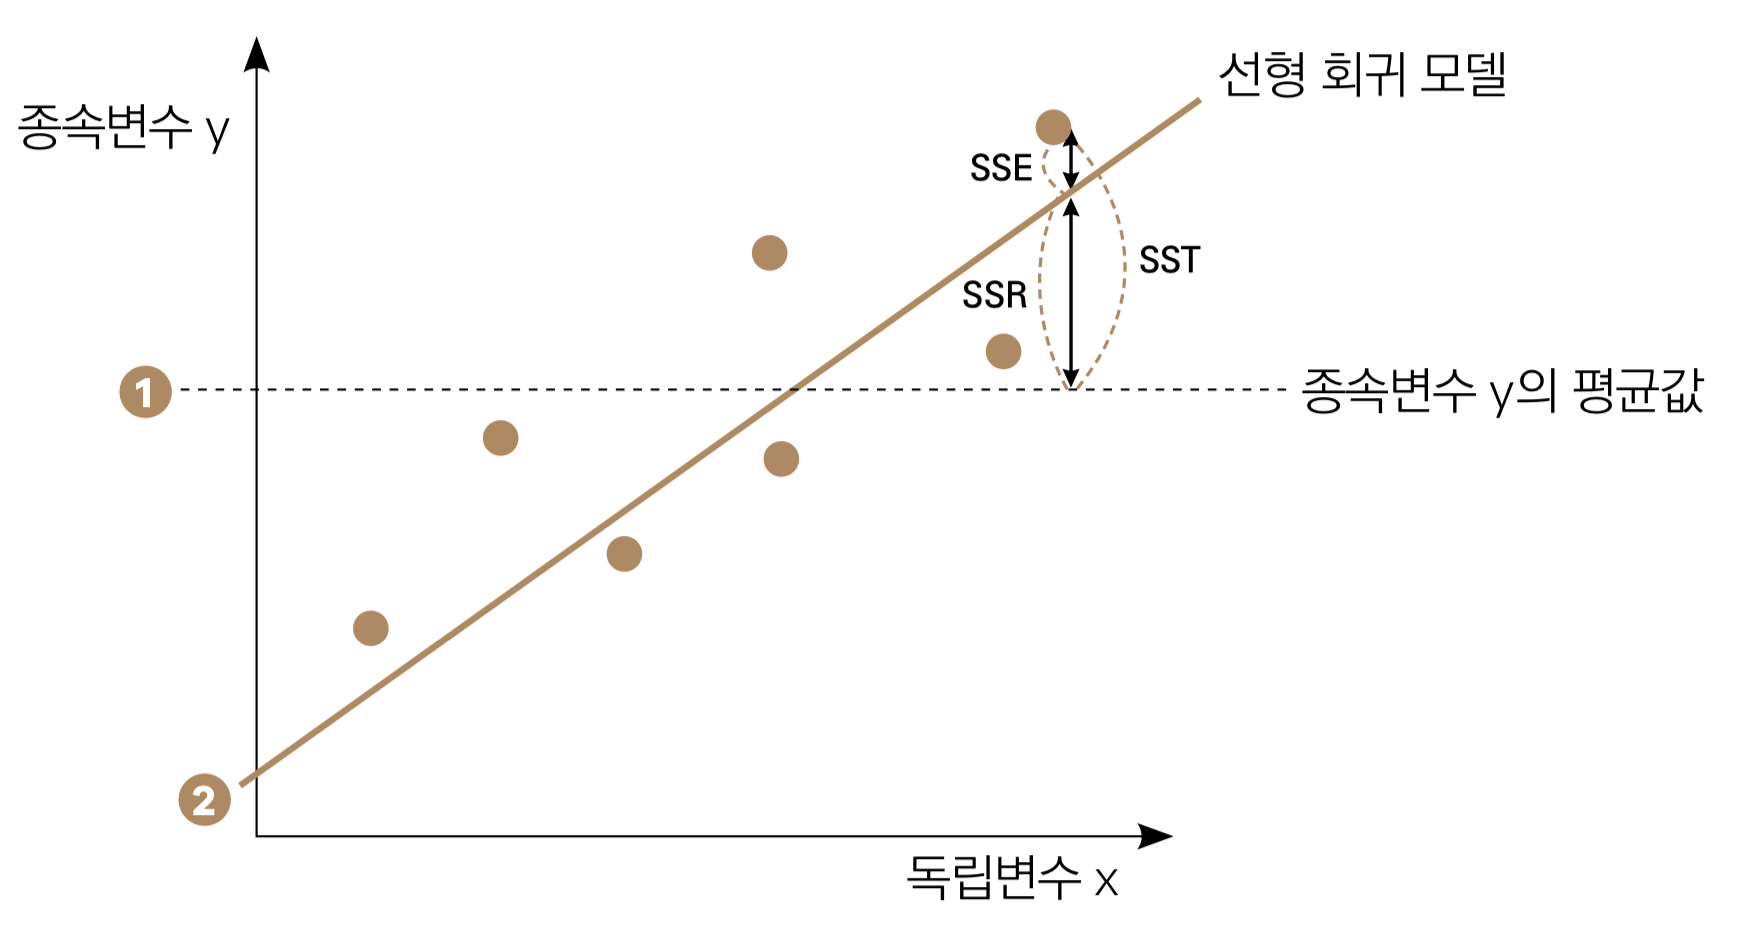

In [30]:
Image('images/1.jpeg')

In [31]:
model.score(X_train, y_train)

0.7368220127747351

선형회귀는 즉 손실함수 loss function을 최소화 하는 선을 찾아서 모델을 만드는 것.
- = 이때 RSME, MSE같은 것들이 손실함수가 되는 것.
- = 선형 1차 함수로 표현이 가능
- y = ax + b
- 독립변수가 많으면, 기울기쪽에 변수가 많아지는 것
- 예 ) 청구비용 = Age(A) + Sex(B) + Bmi(C) + Children(D) + Smoker(E) + i

이 때 기울기 값을 계수 coefficient라고도 한다. 

In [32]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [33]:
pd.Series(model.coef_, index = X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [34]:
# 해석하자면 나이가 1 올라갈 때 265만큼 비용증가
# 남자인 경우 17만큼 증가...

In [35]:
# y절편 구하기
model.intercept_

-11576.999976112338

In [36]:
# 그러면 식이 나왔음.
# y = 264.799(Age) + 17.344661(Sex) + ..... -11576.9999

# 주의할점
- 모델의 계수를 해석 할 때 부호의 영향파악해야함. 0에 가까울수록 의미 없는 계수.
- 또한 여러계수를 서로 비교할때 단순히 절대값이 더 크면 영향력이 크다고 볼수도 없음. 예를들어 성별은 0과 1로만 되어 있는 반면 나이는 20부터 60 등 십의 자리 숫자를 가지고 있다. 즉 성별이 1 커질때와 나이가 1커질때가 가지는 영향력은 다르다. 
- 이 부분을 비교하려면 스케일링 작업이 필요하다  (KNN)